# Biodiversity Data Analysis

> A look into biodiversity data regarding species conservation status, especially focused in National Parks.

## The Datasets
### Species
The first data set is the 'species_info.csv' which takes a species and catergorizes into their classes while showing their scientific and common name along with their conservation status. Columns are:  
- **category** - the classification of the species, ex. Mammal
- **scientific_name** - the scientific name of the species, ex. Canis Lupus
- **common_names** - the common name of the species, ex. Gray Wolf
- **conservation_status** - the conservation status of the species, ex. Endangered

In [36]:
import pandas as pd
species = pd.read_csv("species_info.csv")
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


### Observations  
The second dataset, 'observations.csv,' takes a species and tracks the number of observations at the National Parks. Columns are:  
- **scientific_name** - the scientific name of the species, ex. Canis Lupus
- **park_name** - the name of the park the species were spotted in, ex. Yellow Stone National Park
- **observations** - how many times the species were spotted in that park, ex. 67

In [35]:
species = pd.read_csv("observations.csv")
species.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


## Basic Information
A look into the data sets a bit more, exploring the different columns and the data within.

In [47]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

## Analysis
Analysis of data given. The first code cell is just imports and the loading of data in a shorter form then previously loaded. 

In [2]:
#General 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

#Load data
ob = pd.read_csv("observations.csv")
sp = pd.read_csv("species_info.csv")

The following table and bar graph shows how many speciies in each catergory is found in every conservation status. 

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


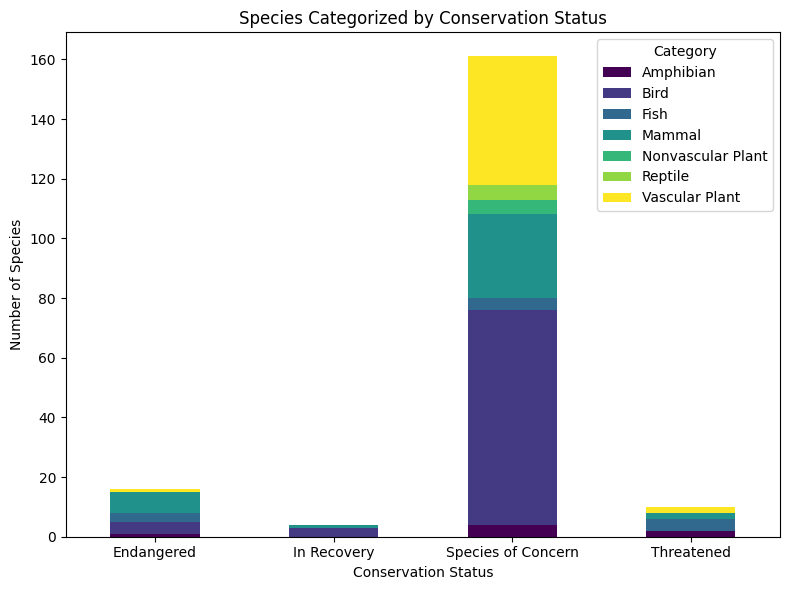

In [8]:
#Species compared to conservation status

new_sp = sp[sp['conservation_status'].notna()] #exclude null values

count = (new_sp.groupby(['conservation_status', 'category']).size().unstack(fill_value=0))

display(count) #table view

count.plot(kind ='bar', stacked = True, figsize = (8, 6), colormap = 'viridis') 

plt.title('Species Categorized by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.legend(title = 'Category')
plt.show()

> This is good in being able to see in an easy way a lot of information in a quicker fashion rather than looking through the csv files. The data in this case shows that most common conservation status of species, that do have a certain conservation status, is the label of 'Species of Concern.' In which the most common category was 'Bird,' 'Mammal,' and 'Vascular Plant.'

The following table and graph shows the total endangered species spottings at each National Park. 

park_name
Yellowstone National Park              1558
Yosemite National Park                  943
Bryce National Park                     619
Great Smoky Mountains National Park     393
Name: observations, dtype: int64

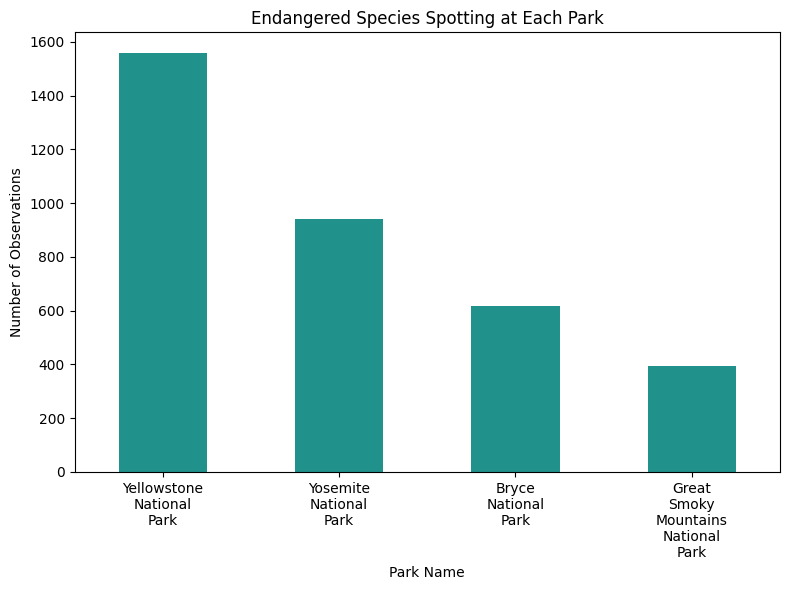

In [37]:
#Endangered species spotting at each park

merged_df = pd.merge(ob, sp, on='scientific_name') #merge 2 dfs on scientific names 

endangered_observations = merged_df[merged_df['conservation_status'] == 'Endangered'] #only endangered species for this one

count = endangered_observations.groupby('park_name')['observations'].sum().sort_values(ascending=False)

display(count) #table view

labels = [label.replace(' ', '\n') for label in count.index]
count.plot(kind = 'bar', figsize = (8, 6), color = '#21918c') 
plt.title('Endangered Species Spotting at Each Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.tight_layout()
plt.show()


This is similar to the previous bar graph but now graphs the number of spottings of each conservaations status at the parks. 

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
park_name,,,,
Bryce National Park,619,388,17011,591
Great Smoky Mountains National Park,393,248,11735,440
Yellowstone National Park,1558,889,40677,1459
Yosemite National Park,943,582,24539,849


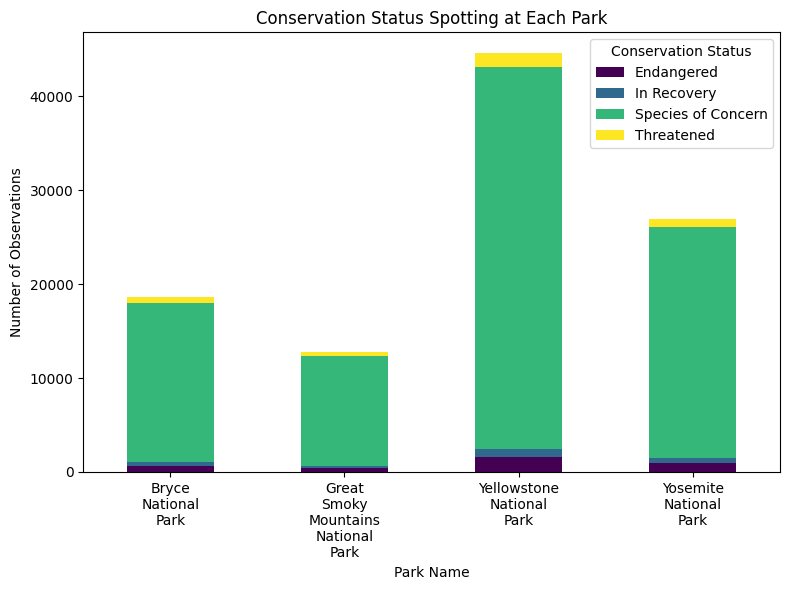

In [32]:
#Conservation status stats at each park 
merged_df = pd.merge(ob, sp, on='scientific_name') #merge 2 dfs on scientific names 
new_df = merged_df[merged_df['conservation_status'].notna()] #exclude null values

count = new_df.groupby(['park_name', 'conservation_status'])['observations'].sum().unstack(fill_value=0)
display(count)

labels = [label.replace(' ', '\n') for label in count.index]
count.plot(kind = 'bar',  stacked=True, figsize = (8, 6), colormap='viridis')
plt.title('Conservation Status Spotting at Each Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.tight_layout()
plt.legend(title = 'Conservation Status')
plt.show()

> This informations is good in order when wanting to control or further protect the most amount of endangered species, or a specefic conservation status. The help can then be focused on the most relevant parks first. 

The following table and bar graph look into the top 10 most spotted species at all the National Parks overall.

scientific_name
Streptopelia decaocto    1785
Holcus lanatus           1780
Castor canadensis        1725
Hypochaeris radicata     1720
Puma concolor            1711
Procyon lotor            1692
Columba livia            1653
Myotis lucifugus         1547
Bidens tripartita        1296
Oxalis dillenii          1276
Name: observations, dtype: int64

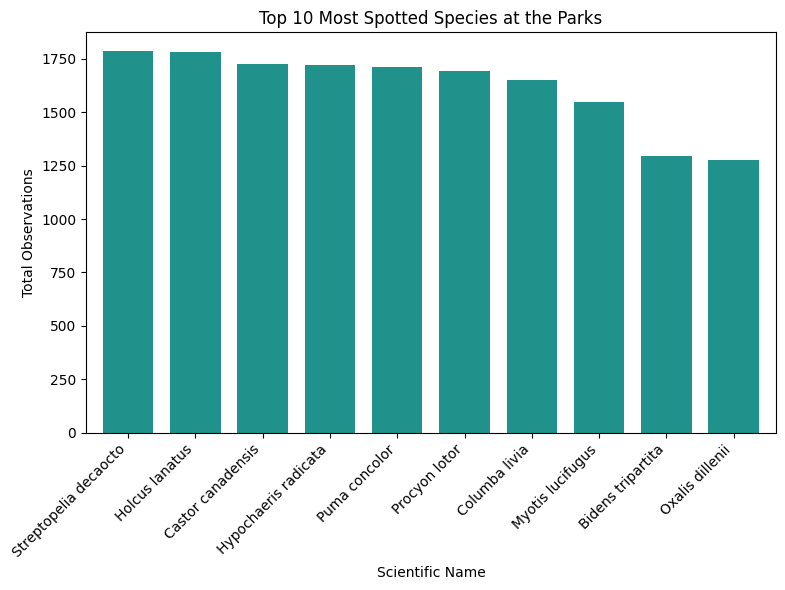

In [29]:
#Most spotted species at the parks

count = ob.groupby('scientific_name')['observations'].sum()

most_spot = count.sort_values(ascending=False).head(10) #top 10 species

display(most_spot) #table view

most_spot.plot(kind = 'bar',figsize = (8, 6), color = '#21918c', width = 0.75)
plt.title('Top 10 Most Spotted Species at the Parks')
plt.xlabel('Scientific Name')
plt.ylabel('Total Observations')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

Now, the following bar graph shows the same information as the previous bar graph, however, instead it now uses the species common name and there are different colors based on the category. This allows for an easier read for a user, both in being able to identify the species with ease and understanding what that species is classified as. 

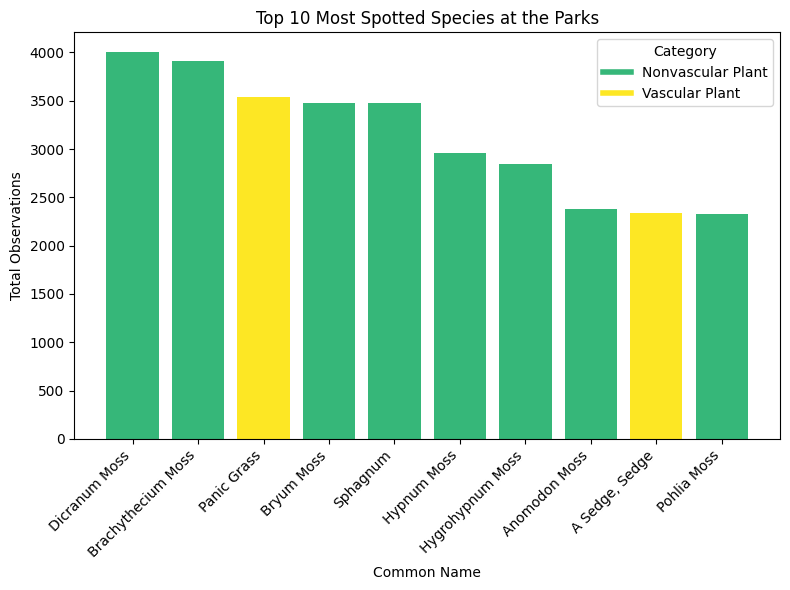

In [39]:
#Most spotted species w/ common name and category color

merged_df = pd.merge(ob, sp, on='scientific_name') #merge 2 dfs on scientific names 

group = merged_df.groupby(['common_names', 'category'])['observations'].sum().reset_index()

most_spotted = group.sort_values(by='observations', ascending = False).head(10) #top 10


custom_colors = {'Amphibian': '#440154','Bird': '#443983', 'Fish': '#31688e', 'Mammal':'#21918c', 'Nonvascular Plant':'#36b779', 'Reptile':'#90d743', 'Vascular Plant':'#fde724'}
color_map = {cat: custom_colors.get(cat, '#999999') for cat in most_spotted['category'].unique()}

bar_colors = most_spotted['category'].map(color_map)

plt.figure(figsize = (8, 6))
plt.bar(most_spotted['common_names'], most_spotted['observations'], color= bar_colors)
plt.title('Top 10 Most Spotted Species at the Parks')
plt.xlabel('Common Name')
plt.ylabel('Total Observations')
plt.xticks(rotation=45, ha='right')

legend_handles = [plt.Line2D([0], [0], color = color_map[cat], lw = 4, label = cat) for cat in categories] #legend
plt.legend(handles=legend_handles, title = 'Category')

plt.tight_layout()
plt.show()

> Knowing the most spotted species is helpful in understanding the layout of the parks, which could then be used later when considering how to improve the park